In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as ttf
from PIL import Image
import scipy

# 1,2번

In [ ]:
def calculate_ssd(img1, img2):
    """Computing the sum of squared differences (SSD) between two images."""
    if img1.size != img2.size:
        print("Images don't have the same shape.")
        return      
    return np.sum((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32))**2)

In [ ]:
imga=Image.open('/content/drive/MyDrive/image1.tif')
imgb=Image.open('/content/drive/MyDrive/image2.tif') #이미지는 shape안됨

In [ ]:
img_arr_a=cv2.imread('/content/drive/MyDrive/image1.tif')
img_arr_b=cv2.imread('/content/drive/MyDrive/image2.tif')

In [ ]:
imga.size

(256, 256)

In [ ]:
type(imga)

PIL.TiffImagePlugin.TiffImageFile

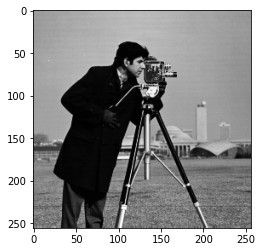

In [ ]:
plt.imshow(imga,'gray')

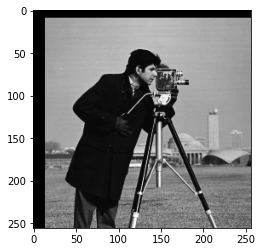

In [ ]:
plt.imshow(imgb,'gray')

In [ ]:
calculate_ssd(imga,imgb)

366758200.0

In [ ]:
ssd_min=calculate_ssd(imga,imgb)
row=[]
col=[]
ssd=[]
p=0
for c in range(256):
  for f in range(256):
    imga_reg = ttf.affine(imga,angle=0,translate=(c,f),scale=1,shear=0,resample=Image.BICUBIC)
    if calculate_ssd(imga_reg,imgb)<ssd_min:
      ssd_min=calculate_ssd(imga_reg,imgb)
      row.append(c)
      col.append(f)
      ssd.append(ssd_min)
    if ssd_min==0:
      break

In [ ]:
ssd_min=calculate_ssd(imga,imgb)
row1=[]
col1=[]
ssd1=[]
for c in range(256):
  for f in range(256):
    imga_reg = ttf.affine(imga,angle=0,translate=(c,f),scale=1,shear=0,resample=Image.BICUBIC)
    ssd_min=calculate_ssd(imga_reg,imgb)
    row1.append(c)
    col1.append(f)
    ssd1.append(ssd_min)

In [ ]:
row[-1],col[-1]

(14, 9)

In [ ]:
min(ssd1), ssd1.index(min(ssd1)), row1[ssd1.index(min(ssd1))],col1[ssd1.index(min(ssd1))]

(0.0, 3593, 14, 9)

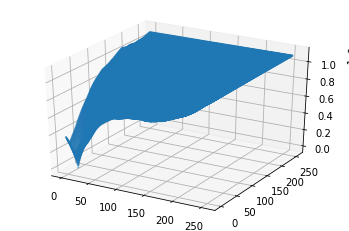

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca( projection='3d')
ax.scatter(xs=row1, ys=col1, zs=ssd1, marker='o', s=1, cmap='Greens')
plt.show()

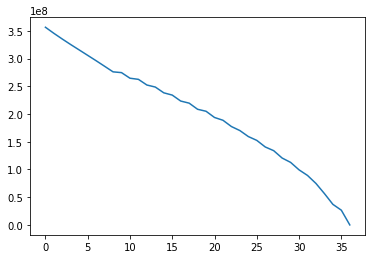

In [ ]:
x=range(len(ssd))
plt.plot(x,ssd)
plt.show()

In [ ]:
ssd[-1]

0.0

In [ ]:
type(img_arr_a)

numpy.ndarray

Text(0.5, 1.0, 'fixed image histogram')

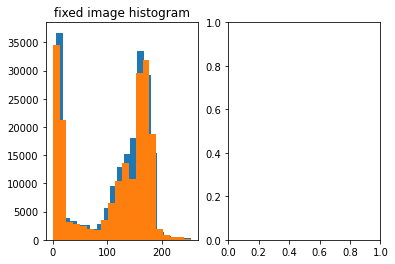

In [ ]:
fig,axes=plt.subplots(1,2)
axes[0].hist(img_arr_a.ravel(),bins=20)
axes[0].set_title('moving image histogram')
axes[0].hist(img_arr_b.ravel(),bins=20)
axes[0].set_title('fixed image histogram')

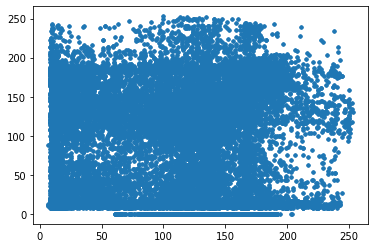

In [ ]:
plt.plot(img_arr_a.ravel(),img_arr_b.ravel(),'.')

Text(0, 0.5, 'imgb_signalbin')

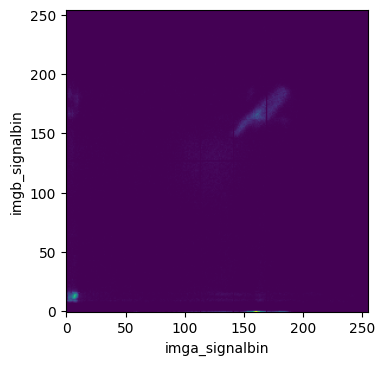

In [ ]:
hist_2d,x_edges,y_edges=np.histogram2d(img_arr_a.ravel(),img_arr_b.ravel(),bins=255)
plt.figure(dpi=100)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('imga_signalbin')
plt.ylabel('imgb_signalbin')

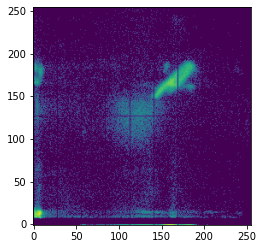

In [ ]:
hist_2d_log=np.zeros(hist_2d.shape)
non_zeros=hist_2d !=0
hist_2d_log[non_zeros]=np.log(hist_2d[non_zeros])
plt.imshow(hist_2d_log.T,origin='lower')

In [ ]:
def mutual_information(hgram):
     """ Mutual information for joint histogram
     """
     # Convert bins counts to probability values
     pxy = hgram / float(np.sum(hgram))
     px = np.sum(pxy, axis=1) # marginal for x over y
     py = np.sum(pxy, axis=0) # marginal for y over x
     px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
     # Now we can do the calculation using the pxy, px_py 2D arrays
     nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
     return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

In [ ]:
mutual_information(hist_2d)

0.42709523116193554

In [ ]:
mi_max=mutual_information(hist_2d)
row=[]
col=[]
mi=[]
for i in range(256):
  for j in range(256):
    imga_reg=ttf.affine(imga,0,(i,j),1,0,Image.BICUBIC)
    imga_reg_arr = np.array(imga_reg)
    opencvImage = cv2.cvtColor(imga_reg_arr, cv2.COLOR_RGB2BGR)
    hist_2d_,x_edges,y_edges=np.histogram2d(opencvImage.ravel(),img_arr_b.ravel(),bins=20)
    if mutual_information(hist_2d_)>mi_max:
      mi_max=mutual_information(hist_2d_)
      row.append(i)
      col.append(j)
      mi.append(mi_max)

In [ ]:
row[-1], col[-1]

(14, 9)

In [ ]:
mi[-1]

2.405461987392732

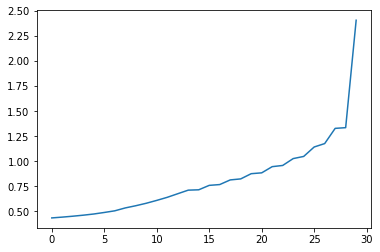

In [ ]:
x=range(len(mi))
plt.plot(x,mi)
plt.show()

In [ ]:
#mi_max=mutual_information(hist_2d)
row2=[]
col2=[]
mi2=[]
for i in range(256):
  for j in range(256):
    imga_reg=ttf.affine(imga,0,(i,j),1,0,Image.BICUBIC)
    imga_reg_arr = np.array(imga_reg)
    opencvImage = cv2.cvtColor(imga_reg_arr, cv2.COLOR_RGB2BGR)
    hist_2d_,x_edges,y_edges=np.histogram2d(opencvImage.ravel(),img_arr_b.ravel(),bins=255)
    mi_max=mutual_information(hist_2d_)
    row2.append(i)
    col2.append(j)
    mi2.append(mi_max)

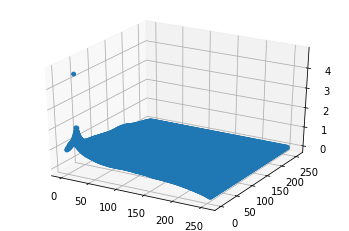

In [ ]:
fig = plt.figure()
ax = fig.gca( projection='3d')
ax.scatter(xs=row2, ys=col2, zs=mi2, marker='o', s=15, cmap='Greens')
plt.show()

In [ ]:
max(mi2), mi2.index(max(mi2)), row2[mi2.index(max(mi2))],col2[mi2.index(max(mi2))]

(2.405461987392732, 3593, 14, 9)

Text(0, 0.5, 'imgb_signalbin')

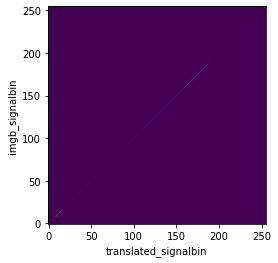

In [ ]:
imga_reg=ttf.affine(imga,0,(14,9),1,0,Image.BICUBIC)
imga_reg_arr = np.array(imga_reg)
opencvImage = cv2.cvtColor(imga_reg_arr, cv2.COLOR_RGB2BGR)
hist_2d_,x_edges,y_edges=np.histogram2d(opencvImage.ravel(),img_arr_b.ravel(),bins=255)

plt.imshow(hist_2d_.T,origin='lower')
plt.xlabel('translated_signalbin')
plt.ylabel('imgb_signalbin')

# 3번

In [ ]:
angle=60
x_t=0
y_t=0

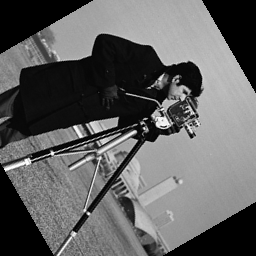

In [ ]:
imga_transform=ttf.affine(imga,angle=angle,translate=(x_t,y_t),scale=1,shear=0,resample=Image.BICUBIC) #PIL이미지
imga_transform

Text(0, 0.5, 'imga_intensity')

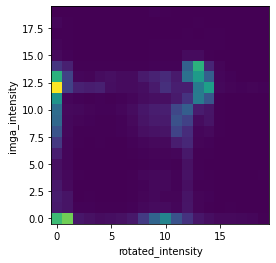

In [ ]:
imga_t_arr = cv2.cvtColor(np.array(imga_transform), cv2.COLOR_RGB2BGR)
hist_2d,x_edges,y_edges=np.histogram2d(imga_t_arr.ravel(),img_arr_a.ravel(),bins=20)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('rotated_intensity')
plt.ylabel('imga_intensity')

In [ ]:
sum=0
for i in range(-180,181):
  sum+=i
sum

0

In [ ]:
#ssd_min=calculate_ssd(imga,imga_transform)
rotation=[]
#row3=[]
#col3=[]
ssd3=[]
mi3=[]
for a in range(-180,181):
  #for b in range(64):
    #for c in range(64):
  imga_reg = ttf.affine(imga,angle=a,translate=(0,0),scale=1,shear=0,resample=Image.BICUBIC)
  imga_reg_arr = np.array(imga_reg)
  opencvImage = cv2.cvtColor(imga_reg_arr, cv2.COLOR_RGB2BGR)

  hist_2d_,x_edges,y_edges=np.histogram2d(imga_t_arr.ravel(),opencvImage.ravel(),bins=20)
  mi_max=mutual_information(hist_2d_)
  ssd_min=calculate_ssd(imga_reg,imga_transform)

  rotation.append(a)
  #row3.append(b)
  #col3.append(c)
  ssd3.append(ssd_min)
  mi3.append(mi_max)

In [ ]:
fig = plt.figure()
ax = fig.gca( projection='3d')
ax.scatter(xs=row3, ys=col3, zs=mi3, marker='o', s=10, cmap='Greens')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.gca( projection='3d')
ax.scatter(xs=row3, ys=col3, zs=ssd3, marker='o', s=10, cmap='Greens')
plt.show()

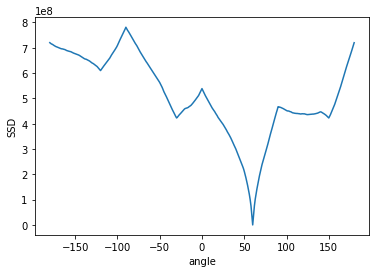

In [ ]:
x=rotation
plt.plot(x,ssd3)
plt.xlabel('angle')
plt.ylabel('SSD')
plt.show()

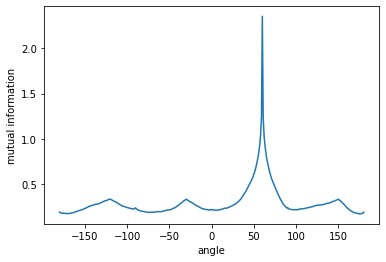

In [ ]:
x=rotation
plt.plot(x,mi3)
plt.xlabel('angle')
plt.ylabel('mutual information')
plt.show()

# 4번

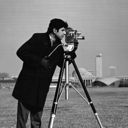

In [ ]:
img_a=imga.resize((128,128),resample=Image.BICUBIC)
img_a

In [ ]:
img_aa=imga.resize((512,512),resample=Image.BILINEAR)
img_aaa=imga.resize((512,512),resample=Image.BICUBIC)
#img_aaaa=img_a.resize((128,128),resample=Image.BICUBIC)

In [ ]:
img_aa=img_a.resize((256,256),resample=Image.NEAREST)
img_aaa=img_a.resize((256,256),resample=Image.BILINEAR)
img_aaaa=img_a.resize((256,256),resample=Image.BICUBIC)

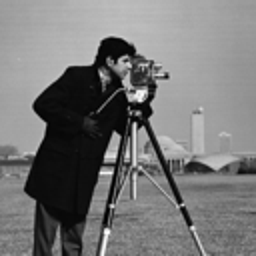

In [ ]:
img_aaaa

In [ ]:
calculate_ssd(imga,img_aa),calculate_ssd(imga,img_aaa),calculate_ssd(imga,img_aaaa)

(12692066.0, 12054370.0, 9928130.0)

Text(0, 0.5, 'interpolated')

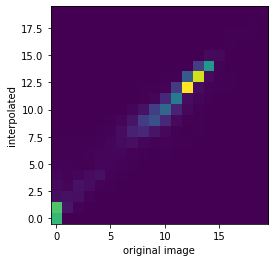

In [ ]:
hist_2d,x_edges,y_edges=np.histogram2d(np.array(imga).ravel(),np.array(img_aa).ravel(),bins=20)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('original image')
plt.ylabel('interpolated')

In [ ]:
mutual_information(hist_2d)

1.3906758932142966

Text(0, 0.5, 'interpolated')

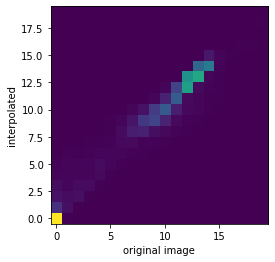

In [ ]:
hist_2d,x_edges,y_edges=np.histogram2d(np.array(imga).ravel(),np.array(img_aaa).ravel(),bins=20)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('original image')
plt.ylabel('interpolated')

In [ ]:
mutual_information(hist_2d)

1.3440207390058656

Text(0, 0.5, 'interpolated')

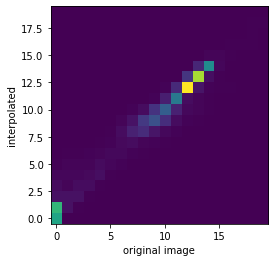

In [ ]:
hist_2d,x_edges,y_edges=np.histogram2d(np.array(imga).ravel(),np.array(img_aaaa).ravel(),bins=20)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('original image')
plt.ylabel('interpolated')

In [ ]:
mutual_information(hist_2d)

1.4453365969311234

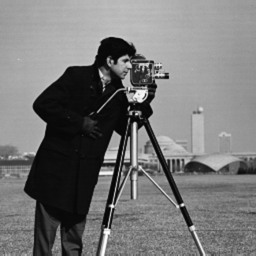

In [ ]:
img_b=imga.resize((512,512),resample=Image.BICUBIC)
img_b=img_b.resize((256,256),resample=Image.BICUBIC)
img_b

In [ ]:
calculate_ssd(img_b,imga)

1045176.0

Text(0, 0.5, 'interpolated')

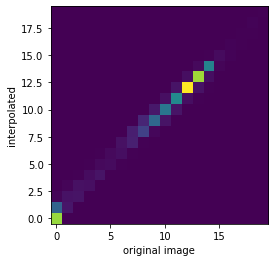

In [ ]:
hist_2d,x_edges,y_edges=np.histogram2d(np.array(imga).ravel(),np.array(img_b).ravel(),bins=20)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('original image')
plt.ylabel('interpolated')

In [ ]:
mutual_information(hist_2d)

1.8919926317270475

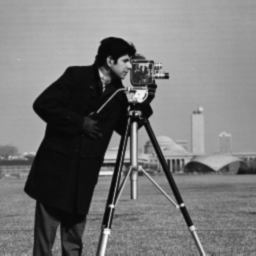

In [ ]:
img_c=imga.resize((512,512),resample=Image.BILINEAR)
img_c=img_c.resize((256,256),resample=Image.BILINEAR)
img_c

In [ ]:
calculate_ssd(img_c,imga)

4065572.0

Text(0, 0.5, 'interpolated')

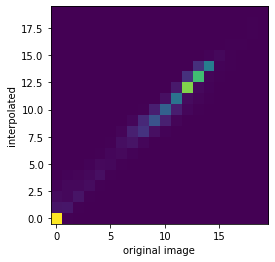

In [ ]:
hist_2d,x_edges,y_edges=np.histogram2d(np.array(imga).ravel(),np.array(img_c).ravel(),bins=20)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('original image')
plt.ylabel('interpolated')

In [ ]:
mutual_information(hist_2d)

1.655088676821228

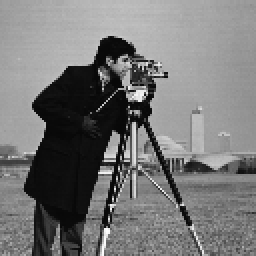

In [ ]:
img__a=imga.resize((128,128),resample=Image.NEAREST)
img__a=img__a.resize((256,256),resample=Image.NEAREST)
img__a

In [ ]:
calculate_ssd(img__a,imga)

24695138.0

Text(0, 0.5, 'interpolated')

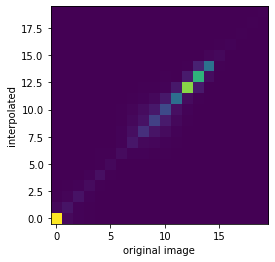

In [ ]:
hist_2d,x_edges,y_edges=np.histogram2d(np.array(imga).ravel(),np.array(img__a).ravel(),bins=20)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('original image')
plt.ylabel('interpolated')

In [ ]:
mutual_information(hist_2d)

1.4137188300354735

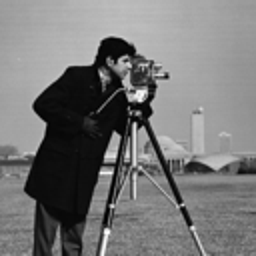

In [ ]:
img__b=imga.resize((128,128),resample=Image.BICUBIC)
img__b=img__b.resize((256,256),resample=Image.BICUBIC)
img__b

In [ ]:
calculate_ssd(img__b,imga)

9928130.0

Text(0, 0.5, 'interpolated')

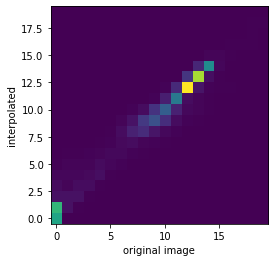

In [ ]:
hist_2d,x_edges,y_edges=np.histogram2d(np.array(imga).ravel(),np.array(img__b).ravel(),bins=20)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('original image')
plt.ylabel('interpolated')

In [ ]:
mutual_information(hist_2d)

1.4453365969311234

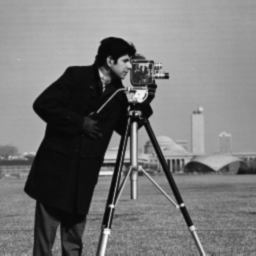

In [ ]:
img__c=imga.resize((512,512),resample=Image.BILINEAR)
img__c=img__c.resize((256,256),resample=Image.BILINEAR)
img__c

In [ ]:
calculate_ssd(img__c,imga)

4065572.0

Text(0, 0.5, 'interpolated')

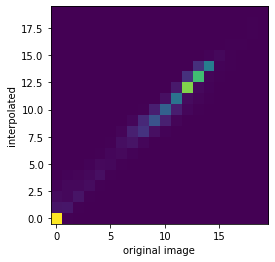

In [ ]:
hist_2d,x_edges,y_edges=np.histogram2d(np.array(imga).ravel(),np.array(img__c).ravel(),bins=20)
plt.imshow(hist_2d.T,origin='lower')
plt.xlabel('original image')
plt.ylabel('interpolated')

In [ ]:
mutual_information(hist_2d)

1.655088676821228

# 5번

매트랩으로...

In [ ]:
!pip install pystackreg

     |████████████████████████████████| 3.7MB 9.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pystackreg: filename=pystackreg-0.2.5-cp36-cp36m-linux_x86_64.whl size=499205 sha256=efc6d367b373b1a54708cd81f9b4293f28edcccc0379f8968df933d4183167ea
  Stored in directory: /root/.cache/pip/wheels/1b/18/ef/18a92e8e860d4fd702fe2111e6894eeac3c132b44e687ba452
Successfully built pystackreg


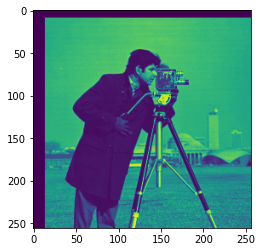

In [ ]:
from pystackreg import StackReg
from skimage import io

ref_img=io.imread('/content/drive/MyDrive/image2.tif')
offset_img=io.imread('/content/drive/MyDrive/image1.tif')

sr = StackReg(StackReg.TRANSLATION)
out_tra=sr.register_transform(ref_img,offset_img)
plt.imshow(out_tra)